In [1]:
# Generic Setup
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pickle_path = Path('../../pickles')

train = pd.read_pickle(pickle_path / "train.pkl")
labels = pd.read_pickle(pickle_path / "labels.pkl")


In [167]:
# Sum across labels df to determine how many times each house charged an electric car
df_a = pd.DataFrame(labels.sum(axis=1))
df_a.rename(columns= {0: 'sum'}, inplace=True)

# Map sums to Booleans
# True - Electric car was charged one or more times at the given house
# False - No electic cars charged at the 
df_a['bool'] = df_a['sum'].where(df_a['sum'] == 0, other=1)
df_a['bool'].replace({0:False, 1:True}, inplace=True)

df_aT = df_a.loc[df_a['bool'] == True]

print(df_aT.head())


          sum  bool
House ID           
11647239  117  True
11655054  207  True
11635803  223  True
11642383  177  True
11655167  285  True


In [13]:
houses_all = train.index.tolist() 
houses_1 = df_aT.index.tolist()
houses_0 = [idx for idx in houses_all if idx not in houses_1]

if len(houses_all) == (len(houses_1) + len(houses_0)):
    print("{} houses with EV\n"
          "{} houses without EV".format(len(houses_1), len(houses_0)))
else: 
    print("WARNING. Did not summessfully segregate data.")


485 houses with EV
1105 houses without EV


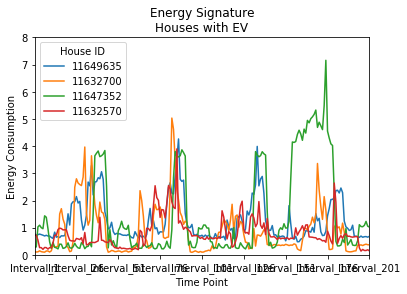

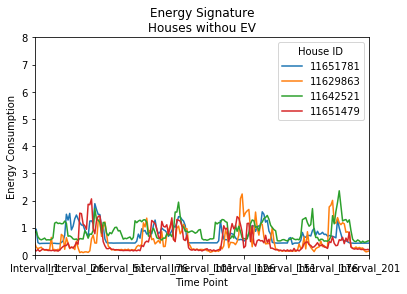

In [47]:
# Randomly sample houses with E-Cars
sample_1 = train.loc[random.choices(houses_1, k=4)].T
sample_0 = train.loc[random.choices(houses_0, k=4)].T

x_max = 200
y_max = 8

ax = sample_1.plot(xlim=[0,x_max], ylim=[0,y_max])
ax.set(
    title='Energy Signature\nHouses with EV',
    xlabel="Time Point", 
    ylabel="Energy Consumption",
    autoscalex_on=True)

plt.show()

ax = sample_0.plot(xlim=[0,x_max], ylim=[0,y_max])
ax.set(
    title='Energy Signature\nHouses withou EV',
    xlabel="Time Point", 
    ylabel="Energy Consumption",
    autoscalex_on=True)

plt.show()

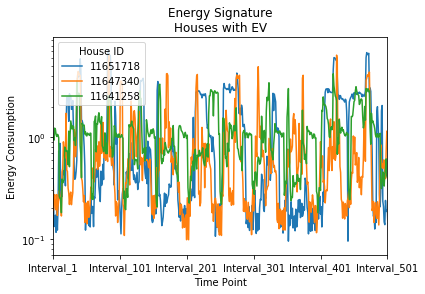

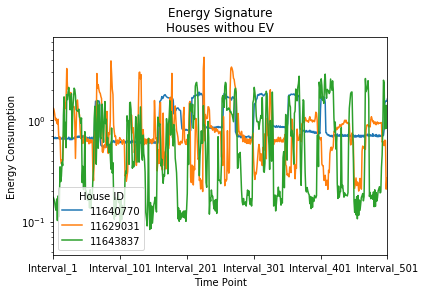

In [48]:
# Randomly sample houses with E-Cars
sample_1 = train.loc[random.choices(houses_1, k=3)].T
sample_0 = train.loc[random.choices(houses_0, k=3)].T

x_max = 500
y_max = 8

ax = sample_1.plot(xlim=[0,x_max], logy=True)
ax.set(
    title='Energy Signature\nHouses with EV',
    xlabel="Time Point", 
    ylabel="Energy Consumption",
    autoscalex_on=True)

plt.show()

ax = sample_0.plot(xlim=[0,x_max], logy=True)
ax.set(
    title='Energy Signature\nHouses withou EV',
    xlabel="Time Point", 
    ylabel="Energy Consumption",
    autoscalex_on=True)

plt.show()

(485, 2880)
                 sum         min         max         avg
count     485.000000  485.000000  485.000000  485.000000
mean     4141.881846    0.300769    7.229496    1.438249
std     11731.504710    2.361065    8.249978    4.073427
min      1040.876285    0.000000    2.316128    0.361415
25%      2182.184701    0.020000    5.122256    0.757703
50%      2694.504968    0.087000    6.434256    0.935592
75%      3645.862677    0.175000    7.690256    1.265925
max    244527.077464   50.875000  163.066000   84.905235


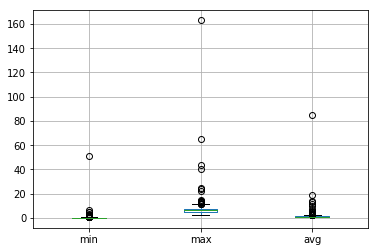

In [34]:
# Separate by classification
sample_1 = train.loc[houses_1]
print(sample_1.shape)

stats_1 = pd.DataFrame(index=sample_1.index)
stats_1['sum'] = pd.DataFrame(sample_1.sum(axis=1))
stats_1['min'] = pd.DataFrame(sample_1.min(axis=1))
stats_1['max'] = pd.DataFrame(sample_1.max(axis=1))
stats_1['avg'] = pd.DataFrame(sample_1.mean(axis=1))

print(stats_1.describe())
stats_1.boxplot(column=['min', 'max', 'avg'])

                 sum          min          max          avg
count    1105.000000  1105.000000  1105.000000  1105.000000
mean     3982.830138     0.292179     5.097922     1.383133
std      7362.481223     1.041916     6.400987     2.556401
min       814.774000     0.000000     0.553000     0.282908
25%      1761.151000     0.028000     2.807000     0.611511
50%      2288.654000     0.090000     3.723000     0.794672
75%      3392.155000     0.178000     4.918000     1.177832
max    131510.776000    17.840000    87.664000    45.663464


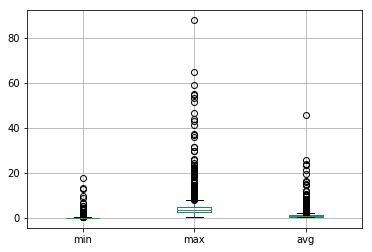

In [35]:
# Separate by classification
sample_0 = train.loc[houses_0]

stats_0 = pd.DataFrame(index=sample_0.index)
stats_0['sum'] = pd.DataFrame(sample_0.sum(axis=1))
stats_0['min'] = pd.DataFrame(sample_0.min(axis=1))
stats_0['max'] = pd.DataFrame(sample_0.max(axis=1))
stats_0['avg'] = pd.DataFrame(sample_0.mean(axis=1))

print(stats_0.describe())
stats_0.boxplot(column=['min', 'max', 'avg'])

## Transform/Engineer Training Data

In [155]:
# Summary stats for each training sample
stats = pd.DataFrame(index=train.index)
stats['sum'] = pd.DataFrame(train.sum(axis=1))
stats['min'] = pd.DataFrame(train.min(axis=1))
stats['max'] = pd.DataFrame(train.max(axis=1))
stats['avg'] = pd.DataFrame(train.mean(axis=1))

# Baseline for each training sample
# Per-house average of all data points < threshold
threshold = 2
temp = train.copy()
temp[temp > threshold] = np.NaN
stats['baseline'] = pd.DataFrame(temp.mean(axis=1))
del temp, threshold


Number of Outliers: 37
Percent Removed: 2.33%

                sum          min          max          avg     baseline
count   1553.000000  1553.000000  1553.000000  1553.000000  1541.000000
mean    3127.751678     0.180346     4.929341     1.086201     0.713194
std     2526.937885     0.387594     2.566797     0.877420     0.289931
min      814.774000     0.000000     0.553000     0.282908     0.005000
25%     1858.206000     0.026000     3.182000     0.645210     0.534529
50%     2417.102414     0.087000     4.391000     0.839272     0.643953
75%     3367.004114     0.170000     6.214256     1.169099     0.804457
max    30073.740000     5.248000    19.610000    10.442271     1.992000


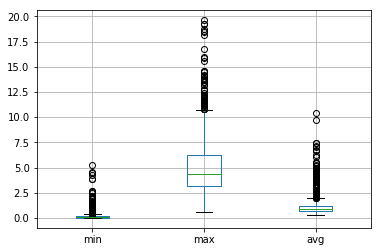

In [156]:
# Outliers: Max Meter Reading
std = stats['max'].std()
mean = stats['max'].mean()
threshold = mean + (2 * std)
outliers = stats.loc[stats['max'] > threshold]

# # Outliers: Baseline
# std = stats.baseline.std()
# mean = stats.baseline.mean()
# threshold = mean + (3 * std)
# outliers = outliers.append(stats.loc[stats.baseline > threshold])
# outliers = outliers.append(stats.loc[stats.baseline == None])

train_clean = train.drop(outliers.index)
stats_clean = stats.drop(outliers.index)

train_ct = train.shape[0]
cleaned_ct = train_clean.shape[0]
outlier_ct = outliers.shape[0]
print("Number of Outliers: {}".format(outlier_ct))
print("Percent Removed: {}%\n".format(round(outlier_ct/train_ct*100, 2)))

print(stats_clean.describe())
stats_clean.boxplot(column=['min', 'max', 'avg'])

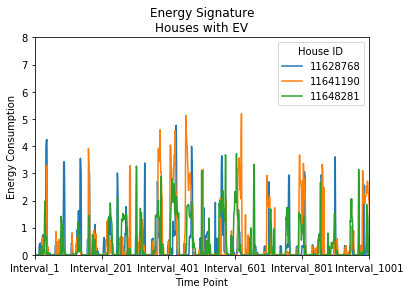

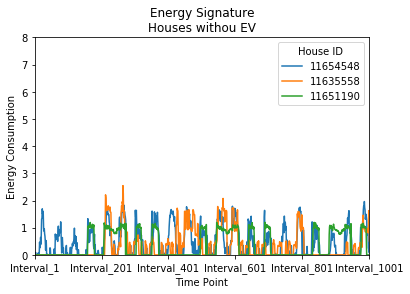

In [157]:
# Normalize data to the baseline
test = train_clean.apply(lambda x: x - stats_clean.baseline)
test[test < 0] = 0

# Randomly sample houses with E-Cars
sample_1 = test.loc[random.choices(houses_1, k=3)].T
sample_0 = test.loc[random.choices(houses_0, k=3)].T

x_max = 1000
y_max = 8

ax = sample_1.plot(xlim=[0,x_max], ylim=[0,y_max])
ax.set(
    title='Energy Signature\nHouses with EV',
    xlabel="Time Point", 
    ylabel="Energy Consumption",
    autoscalex_on=True)

plt.show()

ax = sample_0.plot(xlim=[0,x_max], ylim=[0,y_max])
ax.set(
    title='Energy Signature\nHouses withou EV',
    xlabel="Time Point", 
    ylabel="Energy Consumption",
    autoscalex_on=True)

plt.show()

## Testing

In [165]:
# Split into features and classifications
X = train_clean.copy(deep=True)
y = df_a['bool'].drop(outliers.index, errors='ignore')

from collections import namedtuple
df_summary = namedtuple('df_summary', ['rows', 'cols', 'idx_list'])

# Drop NA-containing rows from X
before = df_summary(X.shape[0], X.shape[1], X.index.tolist())
X = X.dropna()
after = df_summary(X.shape[0], X.shape[1], X.index.tolist())
print("{} Rows were dropped for NA reasons.".format(before.rows - after.rows))

# Drop corresponsing rows from y
removed_idx = []
for house_id in before.idx_list: 
    if house_id not in after.idx_list: 
        removed_idx.append(house_id)
y = y.drop(index=removed_idx)

# Scale the features between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)                                    
X_scaled = scaler.transform(X)

# Split data into training and testing
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    random_state=0)


4 Rows were dropped for NA reasons.


In [166]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Solver = ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.858
